In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
import numpy as np 
from numpy import linalg as LA 

m, n = 2, 3
A = np.random.rand(m, n)

U, S, V = LA.svd(A) 
print ('Frobenius norm of (UU^T - I) =', \
    LA.norm(U.dot(U.T) - np.eye(m)))
print ('\n', S, '\n')
print ('Frobenius norm of (VV^T - I) =', \
    LA.norm(V.dot(V.T) - np.eye(n)))

Frobenius norm of (UU^T - I) = 3.0720456998991413e-16

 [1.43422168 0.57676057] 

Frobenius norm of (VV^T - I) = 9.061261782293815e-16


# Image Compression 

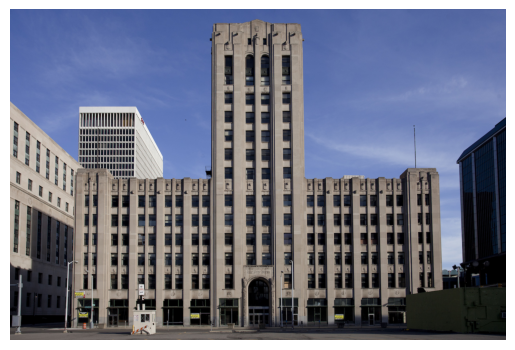

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('building2.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show() 

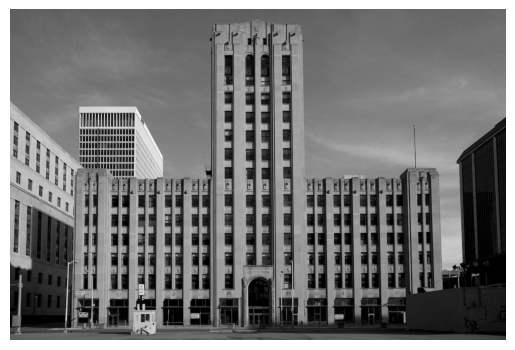

In [4]:
import skimage
import skimage.io

# to gray 
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
img_gray = (skimage.color.rgb2gray(img)*255).astype(int)
plt.imshow(img_gray, 'gray')
plt.axis('off')
plt.show()

In [5]:

from numpy import linalg as LA 

U, S, V = LA.svd(img_gray) 

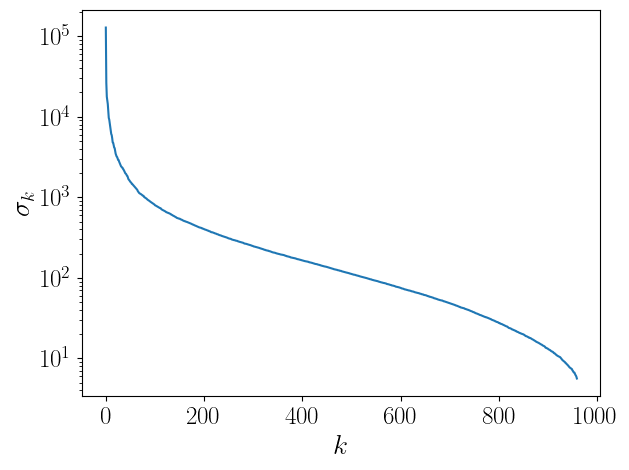

In [6]:
from matplotlib.backends.backend_pdf import PdfPages


plt.semilogy(S) 
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\sigma_k$', fontsize = 20)
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', labelsize=18)
plt.tight_layout()

plt.show()

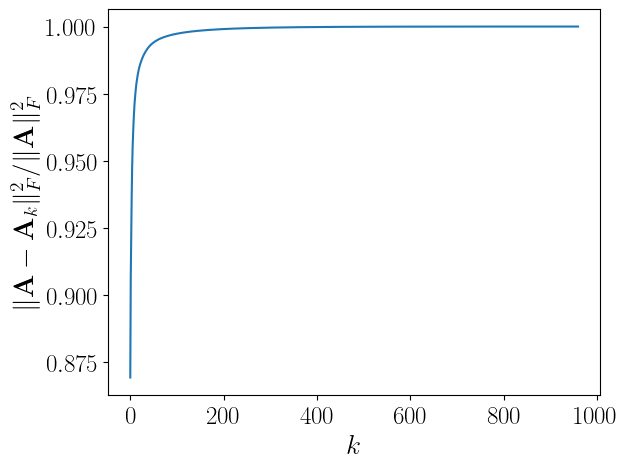

In [7]:
# percentage of preserving energy

a = np.sum(S**2)
b = np.zeros_like(S)
for i in range(S.shape[0]):
    b[i] = np.sum(S[:i+1]**2, axis = 0)/a

plt.plot(b)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\|\mathbf{A} - \mathbf{A}_k\|_F^2 / \|\mathbf{A}\|_F^2$', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()

plt.show()
    

In [8]:
## error
e =  1- b

In [9]:

def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

# A = gray
# U, S, V = LA.svd(A)
A1 = []
for k in range(5, 100, 5):
    A1.append(approx_rank_k(U, S, V,k))

MovieWriter imagemagick unavailable; using Pillow instead.


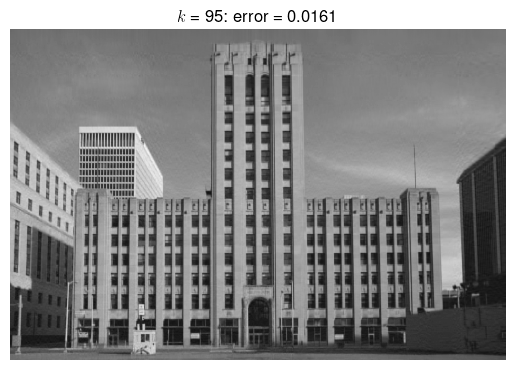

In [10]:
# show results
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
fig, ax = plt.subplots()
def update(i):
    ani = plt.cla()
    ani = plt.imshow(A1[i], 'gray')
    label = '$k$ = %d: error = %.4f' %(5*i + 5, e[i])
    ax.set_xlabel(label)
    ani = plt.axis('off')
    ani = plt.title(label)

    return ani, ax 

anim = FuncAnimation(fig, update, frames=np.arange(0, len(A1)), interval=500)
anim.save('a.gif', dpi = 300, writer = 'imagemagick')
plt.show()